___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import numpy as np

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [5]:
sorteio = []
for i in range (1001):
    r = randint(1, 7)
    sorteio.append(r)
print(sorteio)

[6, 5, 6, 1, 3, 1, 4, 1, 3, 4, 4, 6, 2, 3, 6, 6, 1, 2, 4, 3, 5, 6, 4, 6, 6, 5, 3, 6, 5, 4, 4, 1, 3, 5, 2, 3, 5, 4, 1, 4, 5, 1, 1, 3, 6, 6, 5, 2, 4, 4, 4, 6, 3, 2, 5, 1, 2, 2, 3, 1, 4, 4, 3, 2, 5, 5, 6, 1, 4, 1, 4, 5, 6, 2, 2, 1, 2, 6, 1, 4, 2, 5, 2, 6, 1, 3, 4, 3, 4, 3, 5, 5, 6, 5, 1, 5, 1, 6, 3, 3, 5, 5, 6, 3, 4, 2, 1, 6, 2, 2, 2, 6, 4, 5, 5, 4, 2, 4, 5, 1, 3, 2, 1, 4, 1, 4, 6, 6, 1, 6, 5, 4, 5, 2, 6, 1, 2, 1, 3, 1, 2, 3, 4, 6, 2, 1, 4, 5, 4, 4, 4, 6, 3, 2, 4, 1, 2, 1, 5, 4, 3, 6, 1, 3, 4, 3, 5, 5, 1, 1, 2, 3, 3, 5, 3, 2, 5, 5, 5, 3, 4, 1, 5, 5, 1, 3, 2, 5, 1, 3, 6, 5, 3, 5, 1, 4, 4, 6, 2, 4, 5, 3, 5, 4, 4, 1, 3, 3, 6, 3, 3, 3, 2, 1, 4, 5, 3, 1, 2, 3, 2, 4, 3, 5, 6, 3, 5, 6, 1, 6, 2, 2, 4, 3, 4, 5, 2, 2, 1, 1, 4, 2, 3, 2, 6, 5, 1, 2, 2, 3, 5, 1, 3, 2, 4, 4, 4, 3, 1, 3, 6, 5, 2, 6, 2, 3, 3, 5, 2, 3, 5, 1, 5, 2, 5, 6, 1, 2, 6, 4, 4, 1, 4, 3, 2, 3, 4, 1, 6, 4, 4, 3, 1, 6, 4, 5, 2, 4, 5, 3, 1, 5, 3, 2, 3, 6, 4, 1, 5, 3, 6, 4, 5, 4, 4, 6, 2, 1, 3, 2, 4, 1, 6, 3, 1, 2, 6, 2, 5, 5, 2, 4, 6, 

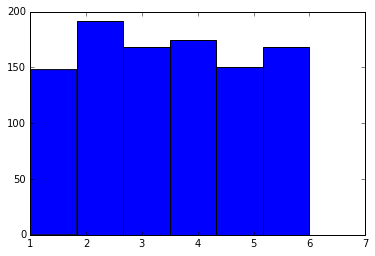

In [6]:
histograma1 = plt.hist(sorteio, bins=6)
plt.show()

#### a)
    Pode-se afirmar que a face dois tem mais probabilidade de ocorrer do que as demais, e a face cinco tem menor probabilidade que as demais.
#### b)
    Primeiramente pode-se considerar que o espaço amostral não é suficiente para as propabilidades ficarem próximas.
    Mas o que realmente ocorre é que em qualquer algorítimo que gera números aleatórios na realidade gera números pseudo aleatórios, visto a fonte: https://www.random.org/

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [10]:
soma = 0
for i in range (1001):
    r1 = randint(1, 7)
    r2 = randint(1, 7)
    rr = r1 + r2
    if rr == 7:
        soma += 1
print("a)")
print((soma/1000)*100,"%")


a)
16.900000000000002 %


In [3]:
soma1 = 0
for i in range (1001):
    r_1 = 1
    r_2 = randint(1, 7)
    
    if r_2 == 6:
        soma1 += 1
print("b)")
print((soma1/1000)*100,"%")

b)
16.1 %


#### Resposta
    As probabilidades são semelhantes pois seguem o conceito de Probabilidade Condicional, que demonstra a independência na ordem em que ocorrem eventos como o exemplificado; visto a fonte: http://brasilescola.uol.com.br/matematica/probabilidade-condicional.htm

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [31]:
ganha = []
perde = []

for i in range(10000):
    portas = [1,2,3]
    premiada = np.random.choice(portas)
    escolhida = np.random.choice(portas)
    
    if  premiada == escolhida:
        portas.remove(escolhida)
        portas.remove(np.random.choice(portas))
        perde.append('perde')
        
    elif premiada != escolhida:
        portas.remove(escolhida)
        portas.remove(premiada)
        ganha.append('ganha')
        
print(len(ganha)/100,'%')

66.59 %


#### Resposta

    A solução obtida é semelhante a esperada pelo Teorema de Baynes(66,6%), visto a fonte:https://pt.wikipedia.org/wiki/Problema_de_Monty_Hall